<a href="https://colab.research.google.com/github/narrasriram/Covid-19_Detection_and_Interpretation_in_Chest_X-Ray_Images/blob/master/Covid_19_Detection_Using_Tensorflow_Customized_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2

#Dataset Retrieval

In [141]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [142]:
csv_data = pd.read_csv("/content/covid-chestxray-dataset/metadata.csv")

In [143]:
csv_data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [144]:
csv_data['view'].value_counts(dropna=False)

PA           338
AP Supine    233
AP           192
L             82
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

In [6]:
pa_count=0
aps_count=0
ap_count=0
l_count=0
axial_count=0
coronal_count=0
ape_count=0
for view_rep in csv_data['view']:
  if(view_rep=="PA" and pa_count==0):
    pa_view_image = csv_data['filename']
    pa_count=pa_count+1
  if(view_rep=="AP Supine" and aps_count==0):
    aps_view_image = csv_data['filename']
    aps_count=aps_count+1
  if(view_rep=="AP" and ap_count==0):
    ap_view_image = csv_data['filename']
    ap_count=ap_count+1
  if(view_rep=="L" and l_count==0):
    l_view_image = csv_data['filename']
    l_count=l_count+1
  if(view_rep=="Axial" and axial_count==0):
    axial_view_image = csv_data['filename']
    axial_count=axial_count+1
  if(view_rep=="Coronal" and coronal_count==0):
    coronal_view_image = csv_data['filename']
    coronal_count=coronal_count+1
  if(view_rep=="AP Erect" and ape_count==0):
    ape_view_image = csv_data['filename']
    ape_count=ape_count+1



In [145]:
pa_view_image = csv_data.loc[csv_data['view'] == "PA", 'filename'].iloc[0]
print(pa_view_image)

aps_view_image = csv_data.loc[csv_data['view'] == "AP Supine", 'filename'].iloc[2]
print(aps_view_image)

ap_view_image = csv_data.loc[csv_data['view'] == "AP", 'filename'].iloc[0]
print(ap_view_image)

l_view_image = csv_data.loc[csv_data['view'] == "L", 'filename'].iloc[0]
print(l_view_image)

axial_view_image = csv_data.loc[csv_data['view'] == "Axial", 'filename'].iloc[0]
print(axial_view_image)

coronal_view_image = csv_data.loc[csv_data['view'] == "Coronal", 'filename'].iloc[0]
print(coronal_view_image)

ape_view_image = csv_data.loc[csv_data['view'] == "AP Erect", 'filename'].iloc[0]
print(ape_view_image)

auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
streptococcus-pneumoniae-pneumonia-1.jpg
SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
nejmoa2001191_f1-L.jpeg
jkms-35-e79-g001-l-d.jpg
kjr-21-e24-g001-l-b.jpg
180e8fe6c27840acf913013a23328a_jumbo.jpeg


#View the Images of Every View

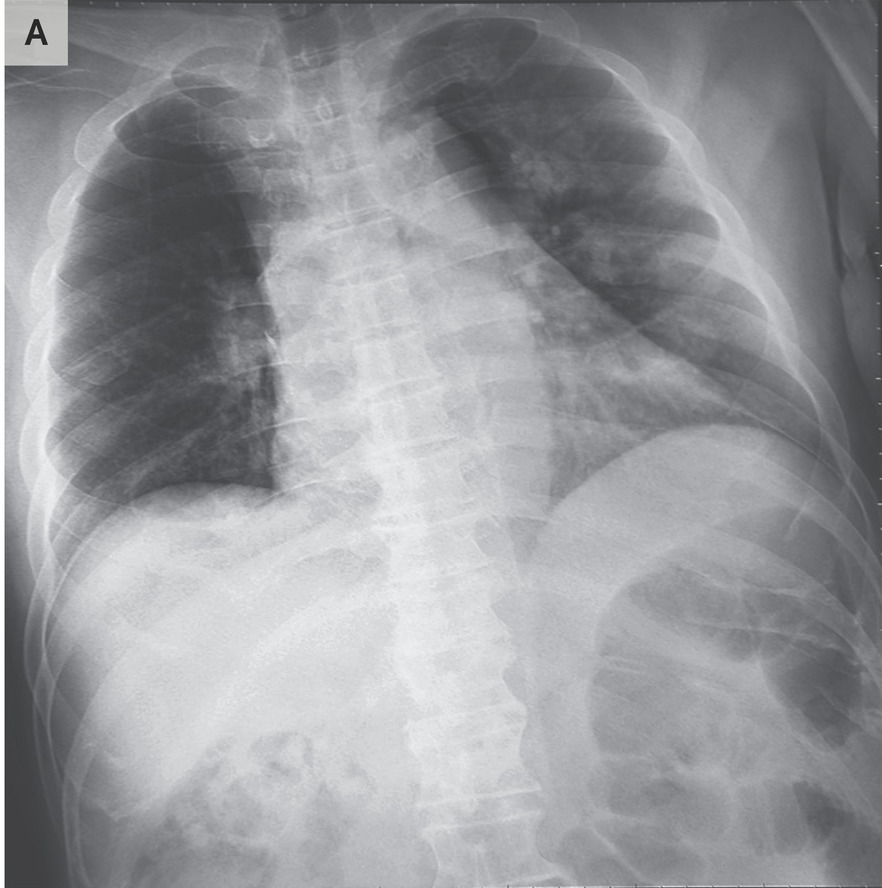

In [146]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+pa_view_image, width=224, height=224)


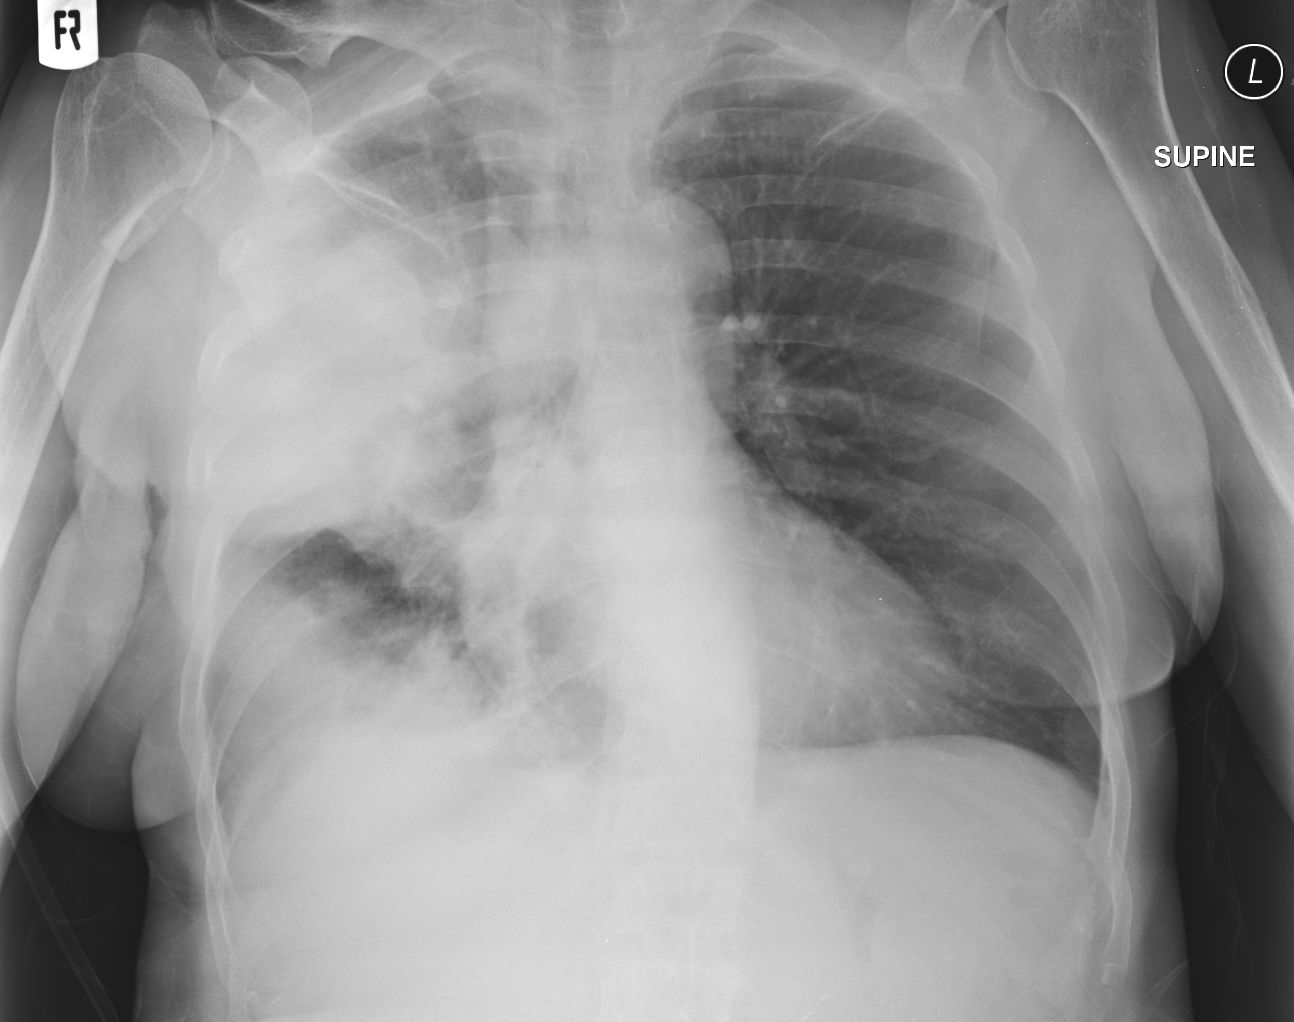

In [147]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+aps_view_image, width=224, height=224)

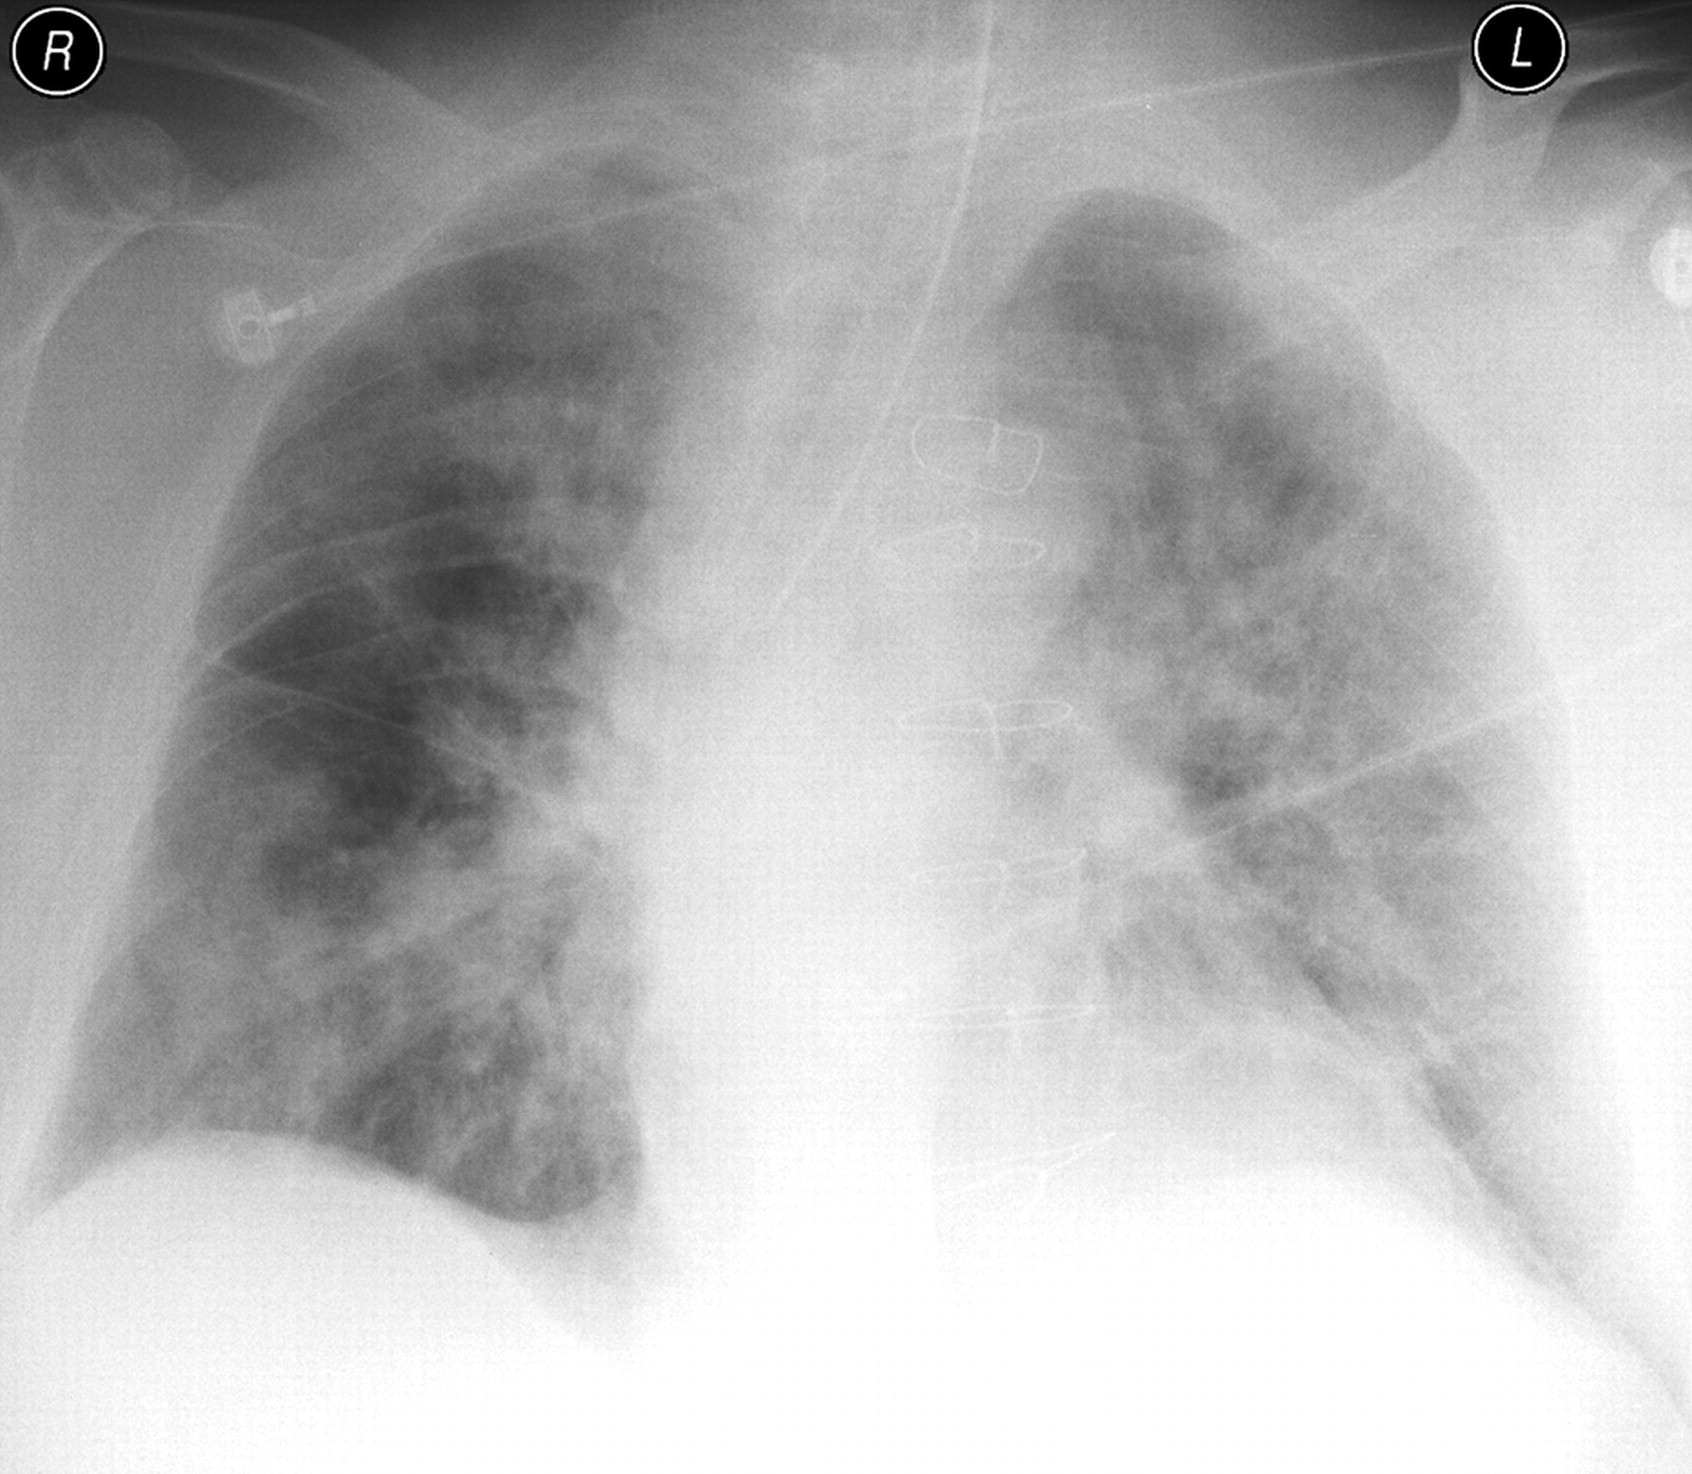

In [148]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+ap_view_image, width=224, height=224)

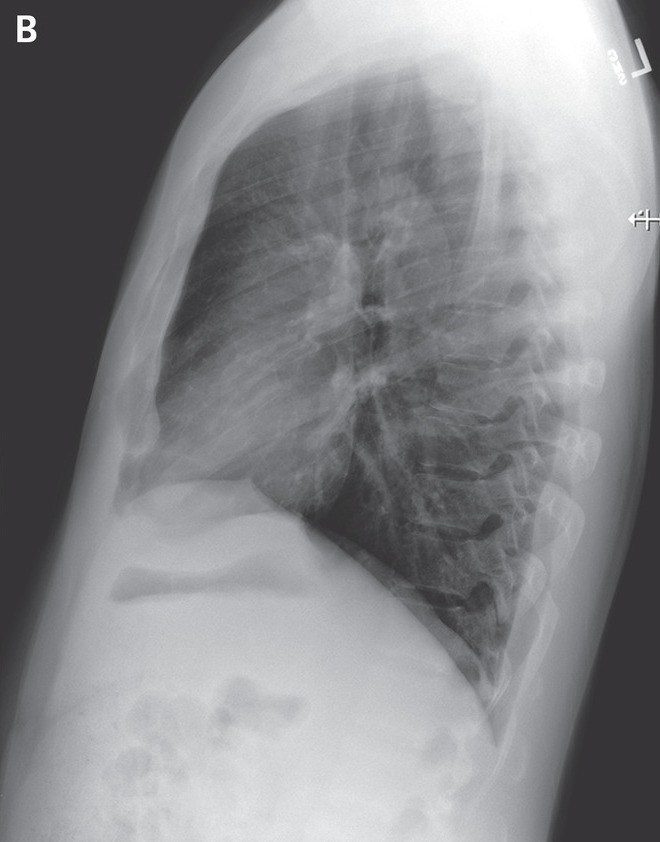

In [149]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+l_view_image, width=224, height=224)

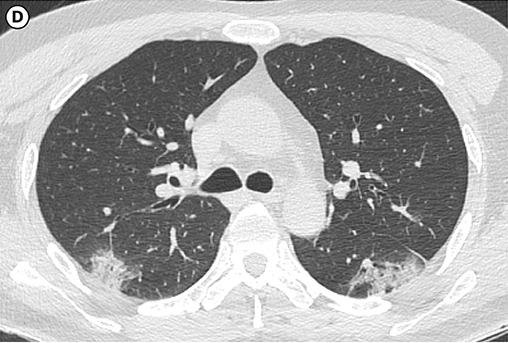

In [150]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+axial_view_image, width=224, height=224)

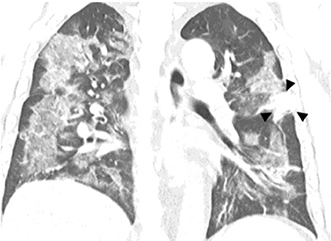

In [151]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+coronal_view_image, width=224, height=224)

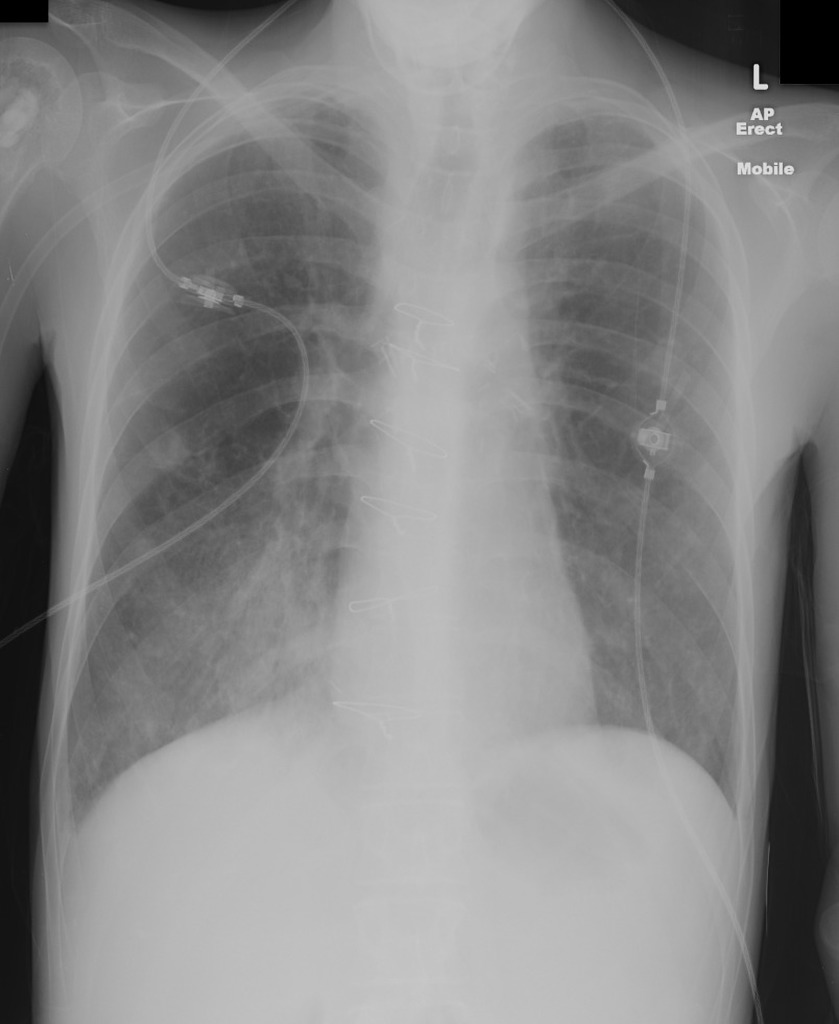

In [152]:
from IPython.display import Image
Image("/content/covid-chestxray-dataset/images/"+ape_view_image, width=224, height=224)

In [153]:
for x in csv_data['filename']:
  if x.split('.')[-1]=='gz':
    csv_data.drop(csv_data.index[csv_data['filename']==x], 
              inplace=True)

In [154]:
csv_data = csv_data[(csv_data['finding']!='Chlamydophila')&(csv_data['finding']!='Legionella')&(csv_data['finding']!='Klebsiella')
            &(csv_data['finding']!='todo')&(csv_data['finding']!='Lymphocytic Interstitial Pneumonia')
            &(csv_data['finding']!='Bacterial')&(csv_data['finding']!='Multilobar Pneumonia')&(csv_data['finding']!='Round pneumonia')
            &(csv_data['finding']!='Allergic bronchopulmonary aspergillosis')&(csv_data['finding']!='Influenza')&(csv_data['finding']!='Swine-Origin Influenza A (H1N1) Viral Pneumonia')
            &(csv_data['finding']!='Accelerated Phase Usual Interstitial Pneumonia')&(csv_data['finding']!='Unusual Interstitial Pneumonia')
            &(csv_data['finding']!='Chronic eosinophilic pneumonia')&(csv_data['finding']!='Eosinophilic Pneumonia')&(csv_data['finding']!='Allergic bronchopulmonary aspergillosis ')
            &(csv_data['finding']!='Cryptogenic Organizing Pneumonia')&(csv_data['finding']!='Pneumonia')&(csv_data['finding']!='Tuberculosis')&(csv_data['finding']!='Lobar Pneumonia')
            &(csv_data['finding']!='Lipoid')&(csv_data['finding']!='Varicella')&(csv_data['finding']!='Mycoplasma Bacterial Pneumonia')&(csv_data['finding']!='Nocardia')
            &(csv_data['finding']!='Eosinophilic pneumonia')&(csv_data['finding']!='ARDS')&(csv_data['finding']!='MRSA')&(csv_data['finding']!='MERS-CoV')]
csv_data = csv_data[csv_data['view']=='PA']

In [155]:
csv_data['finding'].value_counts(dropna=False)

COVID-19          180
Pneumocystis       21
Streptococcus      12
COVID-19, ARDS     11
No Finding         10
SARS                8
Name: finding, dtype: int64

#Run this if there aren't the below directories being created


In [18]:
path = "/content/covid-chestxray-dataset/ModelImages"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/COVID-19"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/Pneumocystis"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/Streptococcus"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/ARDS"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/NoFinding"
os.mkdir(path)

path = "/content/covid-chestxray-dataset/ModelImages/SARS"
os.mkdir(path)


FileExistsError: ignored

#Save all the PA View images in ModelImages Folder with respective subdirectories of classes

In [ ]:
import cv2
import os
pa_view_image = csv_data.loc[csv_data['view'] == "PA", 'filename']
for every_img in pa_view_image:
  image_finding = csv_data.loc[csv_data['filename'] == every_img, 'finding'].iloc[0]
  img = cv2.imread("/content/covid-chestxray-dataset/images/"+every_img, 1)
  if(image_finding=="COVID-19"):
    #print("Entered")
    path = '/content/covid-chestxray-dataset/ModelImages/COVID-19'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  elif(image_finding=="Pneumocystis"):
    path = '/content/covid-chestxray-dataset/ModelImages/Pneumocystis'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  elif(image_finding=="Streptococcus"):
    path = '/content/covid-chestxray-dataset/ModelImages/Streptococcus'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  elif(image_finding=="COVID-19, ARDS"):
    path = '/content/covid-chestxray-dataset/ModelImages/ARDS'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  elif(image_finding=="No Finding"):
    path = '/content/covid-chestxray-dataset/ModelImages/NoFinding'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  elif(image_finding=="SARS"):
    path = '/content/covid-chestxray-dataset/ModelImages/SARS'
    cv2.imwrite(os.path.join(path , every_img), img)
    cv2.waitKey(0)
  else:
    print("Not Copied")

In [156]:
dataset_path = pathlib.Path("/content/covid-chestxray-dataset/ModelImages")

#Split Trainig Set of Images

In [157]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 242 files belonging to 6 classes.
Using 194 files for training.


#Split Validation Set of Images

In [158]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 242 files belonging to 6 classes.
Using 48 files for validation.


In [159]:
class_names = training_dataset.class_names
print(class_names)

['ARDS', 'COVID-19', 'NoFinding', 'Pneumocystis', 'SARS', 'Streptococcus']


In [160]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [161]:
normalized_ds = training_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.10570291 0.9446487


In [162]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [163]:
num_classes = 6

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [164]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

#Fit the Data to Model

In [168]:
model_history = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=30
)

Epoch 1/30
7/7 [==============================] - 9s 1s/step - loss: 1.0352 - accuracy: 0.7474 - val_loss: 1.0524 - val_accuracy: 0.7292
Epoch 2/30
7/7 [==============================] - 9s 1s/step - loss: 0.8823 - accuracy: 0.7526 - val_loss: 1.0256 - val_accuracy: 0.7292
Epoch 3/30
7/7 [==============================] - 9s 1s/step - loss: 0.7670 - accuracy: 0.7732 - val_loss: 1.4281 - val_accuracy: 0.7292
Epoch 4/30
7/7 [==============================] - 9s 1s/step - loss: 0.6995 - accuracy: 0.7887 - val_loss: 1.0458 - val_accuracy: 0.7500
Epoch 5/30
7/7 [==============================] - 9s 1s/step - loss: 0.5426 - accuracy: 0.8351 - val_loss: 1.0253 - val_accuracy: 0.7292
Epoch 6/30
7/7 [==============================] - 9s 1s/step - loss: 0.4894 - accuracy: 0.8299 - val_loss: 1.0080 - val_accuracy: 0.7500
Epoch 7/30
7/7 [==============================] - 9s 1s/step - loss: 0.4027 - accuracy: 0.8711 - val_loss: 1.0940 - val_accuracy: 0.7292
Epoch 8/30
7/7 [=========================

In [227]:
model.save('my_model.h5')

In [171]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 32)       

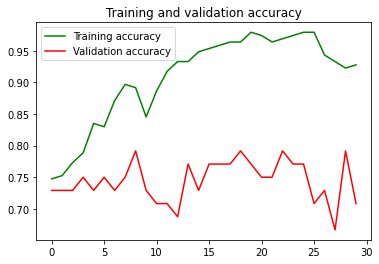

<Figure size 432x288 with 0 Axes>

In [225]:
import matplotlib.pyplot as plt
training_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
training_loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']
total_iterations = range(len(training_accuracy))
plt.plot(total_iterations, training_accuracy, 'g', label='Training accuracy')
plt.plot(total_iterations, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [30]:
model_2 = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 4s 0us/step


In [94]:
model_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#Train the VGG16 dense layers with the Covid-19 Dataset(Transfer Learning)

In [191]:
for every_layer in model_2.layers:
  every_layer.trainable = False

In [192]:
final_layer = model_2.get_layer('block5_conv3')

In [193]:
final_layer_output = final_layer.output

In [194]:
dense = layers.Flatten()(final_layer_output)

In [195]:
dense = layers.Dense(1024, activation='relu')(dense)

In [196]:
dense = layers.Dropout(0.3)(dense) 

In [197]:
dense = layers.Dense (num_classes)(dense) 

In [200]:
from tensorflow.keras import Model
model_3 = Model( model_2.input, dense)

In [201]:
model_3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [223]:
model_history_2 = model_3.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=30
)

Epoch 1/30
7/7 [==============================] - 108s 15s/step - loss: 19.7255 - accuracy: 0.9227 - val_loss: 101.8537 - val_accuracy: 0.7708
Epoch 2/30
7/7 [==============================] - 109s 16s/step - loss: 3.7905 - accuracy: 0.9433 - val_loss: 75.5673 - val_accuracy: 0.8542
Epoch 3/30
7/7 [==============================] - 108s 15s/step - loss: 4.0060 - accuracy: 0.9536 - val_loss: 66.1766 - val_accuracy: 0.8542
Epoch 4/30
7/7 [==============================] - 108s 15s/step - loss: 2.9015 - accuracy: 0.9691 - val_loss: 78.3936 - val_accuracy: 0.8333
Epoch 5/30
7/7 [==============================] - 107s 15s/step - loss: 0.6071 - accuracy: 0.9897 - val_loss: 100.2754 - val_accuracy: 0.8125
Epoch 6/30
7/7 [==============================] - 109s 16s/step - loss: 2.5896 - accuracy: 0.9794 - val_loss: 95.0928 - val_accuracy: 0.8125
Epoch 7/30
7/7 [==============================] - 108s 15s/step - loss: 1.1141 - accuracy: 0.9897 - val_loss: 85.2684 - val_accuracy: 0.8125
Epoch 8/30

In [226]:
model_3.save('VGG15.h5')

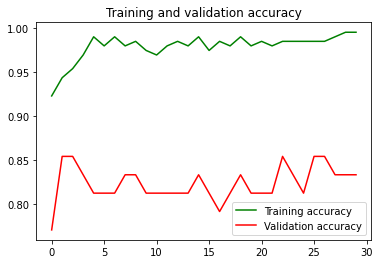

<Figure size 432x288 with 0 Axes>

In [224]:
import matplotlib.pyplot as plt
training_accuracy = model_history_2.history['accuracy']
validation_accuracy = model_history_2.history['val_accuracy']
training_loss = model_history_2.history['loss']
validation_loss = model_history_2.history['val_loss']
total_iterations = range(len(training_accuracy))
plt.plot(total_iterations, training_accuracy, 'g', label='Training accuracy')
plt.plot(total_iterations, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#Bring out the last convolution layer in the VGG16 Trannfer Learning Model(Trained with Covid-19 Dataset)

In [277]:
# Bring out the last convolution layer in the VGG16
required_layer = 'block5_conv3'
proto_model = tf.keras.models.Model([model_3.inputs], [model_3.get_layer(required_layer).output, model_3.output])

#Bring out the last convolution layer in the trained model

In [172]:
required_layer = 'conv2d_5'
proto_model = tf.keras.models.Model([model.inputs], [model.get_layer(required_layer).output, model.output])

#Collect the Activation Maps and Predictions from the Model Testing Image

In [278]:
#test_image = tf.keras.preprocessing.image.load_img('/content/covid-chestxray-dataset/images/radiol.2020200490.fig3.jpeg', target_size=(224, 224),color_mode='rgb')
test_image = tf.keras.preprocessing.image.load_img('/content/covid-chestxray-dataset/images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
#test_image = test_image/200
with tf.GradientTape() as tape:
    activation_maps_with_batch_size, predictions = proto_model(np.array([test_image]))
    loss = predictions[:, 1]

In [279]:
activation_maps_with_batch_size[0].shape

TensorShape([14, 14, 512])

In [280]:
predictions[0].shape

TensorShape([6])

In [281]:
loss

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([730.1716], dtype=float32)>

#Obtain the Activation Maps of Last Convolutional Layer and the gradients

In [282]:
activation_maps = activation_maps_with_batch_size[0]
obtained_gradients = tape.gradient(loss, activation_maps_with_batch_size)[0]

#Consider only the positive effects of gradients on the Activation Maps as they are the main contributors model convergence

In [283]:
required_activation_map_values = tf.cast(activation_maps > 0, 'float32')
required_gradients = tf.cast(obtained_gradients > 0, 'float32')
positive_value_holding_gradients = required_activation_map_values * required_gradients * obtained_gradients

#Compute the weights for the activation maps

In [284]:
activation_maps_weights = tf.reduce_mean(positive_value_holding_gradients, axis=(0, 1))

In [285]:
activation_maps.shape[0: 2]

TensorShape([14, 14])

#Create a Interpretation region map of the size of activation map in last convolutional layer

In [286]:
required_region_image = np.ones(activation_maps.shape[0: 2], dtype = np.float32)

In [287]:
activation_maps_weights.shape

TensorShape([512])

#Compute the weighted average of all the activation maps in last layer


In [288]:
for counter, weight in enumerate(activation_maps_weights):
    required_region_image += weight * activation_maps[:, :, counter]

#Resize the image to 224*224

In [289]:
required_region_image = cv2.resize(required_region_image.numpy(), (224, 224))

In [290]:
required_region_image = np.maximum(required_region_image, 0)

#Standardize the values in the upscaled activation map image

In [291]:
standardized_required_region_image = (required_region_image - required_region_image.min()) / (required_region_image.max() - required_region_image.min())

#Retrieve the upscaled Activation Map image in VIRDIS color map

In [292]:
required_region_image = cv2.applyColorMap(np.uint8(255*standardized_required_region_image), cv2.COLORMAP_VIRIDIS)

In [293]:
cv2.imwrite('upscaled_activationmap_image.png', required_region_image)

True

#Append the colored upscaled Activation Map Image to Testing Image

In [294]:
interpreted_region = cv2.addWeighted(test_image.astype('uint8'), 1, required_region_image, 0.5, 0)
#interpreted_region = cv2.addWeighted(cv2.cvtColor(test_image.astype('uint8'), cv2.COLORMAP_BONE), 0.5, required_region_image, 1, 0)

In [295]:
cv2.imwrite('interpreted_image.png', interpreted_region)

True